In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import io
import requests

In [19]:
url = 'https://raw.githubusercontent.com/ItatiTorrez/Examen-Final-354/refs/heads/main/dataset_cancer/Cancer_Data.csv'
data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [20]:
#verificamos que no existan nulos
print('null value\n',df.isnull().sum(axis=0),'\n')
print('NaN value\n',df.isna().sum(axis=0),'\n')

null value
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst    

In [21]:
#diagnosis es la variable mas relevante Maligno (M) lo cambio a 1 y Benigno (B) lo cambio a 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
#verifico
print(df['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [22]:
print(df.head()) #verifico mi cambio

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

In [23]:
# id no me aporta relevancia al dataset, entonces lo borro
df_new = df.drop(columns=['id', 'Unnamed: 32'])

In [24]:
df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
# Seleccionamos las características y la variable objetivo
X = df_new.drop(columns=['diagnosis'])  # Eliminamos la columna de la clase (diagnosis)
y = df_new['diagnosis']  # Esto es lo que queremos predecir

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado
X_scaled = scaler.fit_transform(X)

# Convertimos los datos escalados a un DataFrame para mantener las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verificación de los resultados (media y desviación estándar)
print(X_scaled_df.mean())  # Debe ser cercano a 0
print(X_scaled_df.std())   # Debe ser cercano a 1

radius_mean               -1.373633e-16
texture_mean               6.868164e-17
perimeter_mean            -1.248757e-16
area_mean                 -2.185325e-16
smoothness_mean           -8.366672e-16
compactness_mean           1.873136e-16
concavity_mean             4.995028e-17
concave points_mean       -4.995028e-17
symmetry_mean              1.748260e-16
fractal_dimension_mean     4.745277e-16
radius_se                  2.372638e-16
texture_se                -1.123881e-16
perimeter_se              -1.123881e-16
area_se                   -1.311195e-16
smoothness_se             -1.529727e-16
compactness_se             1.748260e-16
concavity_se               1.623384e-16
concave points_se          0.000000e+00
symmetry_se                8.741299e-17
fractal_dimension_se      -6.243785e-18
radius_worst              -8.241796e-16
texture_worst              1.248757e-17
perimeter_worst           -3.746271e-16
area_worst                 0.000000e+00
smoothness_worst          -2.372638e-16


In [26]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Verificar las dimensiones
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')



Tamaño de X_train: (455, 30)
Tamaño de X_test: (114, 30)


In [27]:
## PARA BALANCEAR LOS DATOS APLICO SMOTE
from imblearn.over_sampling import SMOTE

# Crear el balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
print("\nDistribución de clases después de aplicar SMOTE:")
print(pd.Series(y_train_balanced).value_counts())



Distribución de clases después de aplicar SMOTE:
diagnosis
0    286
1    286
Name: count, dtype: int64


In [28]:
### ENTRENAMIENTO DEL MODELO
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))



Matriz de confusión:
 [[69  2]
 [ 1 42]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##   Primera ejecución: Confiabilidad, matriz de confusión

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# 1. Entrenar el modelo SVM (con kernel lineal)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# 2. Realizar predicciones con el conjunto de prueba
y_pred = svm_model.predict(X_test)

# 3. Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# 4. Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
print(conf_matrix)

# 5. Obtener un reporte detallado de confiabilidad
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Matriz de Confusión:
[[69  2]
 [ 1 42]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# §  Splits: al menos 100 asignaciones, la mediana de la confiabilidad

Académico (primera ejecucion) 80(train)/20(test) – Investigación 50/50 (segunda ejecución)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Número de ejecuciones
num_exec = 100

# Lista para almacenar los resultados de accuracy
accuracies_80_20 = []
accuracies_50_50 = []

# Primera ejecución (80% entrenamiento, 20% prueba)
for i in range(num_exec):
    # Split 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)

    # Entrenar el modelo SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = svm_model.predict(X_test)

    # Calcular el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_80_20.append(accuracy)

# Segunda ejecución (50% entrenamiento, 50% prueba)
for i in range(num_exec):
    # Split 50/50
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=i)

    # Entrenar el modelo SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = svm_model.predict(X_test)

    # Calcular el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_50_50.append(accuracy)

# Calcular la mediana de los accuracies
median_accuracy_80_20 = np.median(accuracies_80_20)
median_accuracy_50_50 = np.median(accuracies_50_50)

# Resultados
print(f"Mediana de la precisión para 80/20 (80% entrenamiento / 20% prueba): {median_accuracy_80_20}")
print(f"Mediana de la precisión para 50/50 (50% entrenamiento / 50% prueba): {median_accuracy_50_50}")


Mediana de la precisión para 80/20 (80% entrenamiento / 20% prueba): 0.9736842105263158
Mediana de la precisión para 50/50 (50% entrenamiento / 50% prueba): 0.968421052631579


# Aplicar Componentes principales (PCA), determinar la cantidad óptima para mejorar o llegar al resultado anterior. Al menos unas 5 ejecuciones. (12 columnas, 10, 11, 9, 5, 3)

In [31]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Definir las cantidades de componentes principales a evaluar
components_list = [12, 10, 11, 9, 5, 3]

# Lista para almacenar los resultados de precisión
accuracies_pca = []

# Realizamos las ejecuciones para cada cantidad de componentes principales
for n_components in components_list:
    print(f"\nEvaluando PCA con {n_components} componentes principales")

    # Aplico PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)  # Reducir la dimensionalidad

    # Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Entrenar el modelo SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = svm_model.predict(X_test)

    # Calcular el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_pca.append(accuracy)

# Mostrar los resultados
for i, n_components in enumerate(components_list):
    print(f"Precisión con {n_components} componentes principales: {accuracies_pca[i]:.4f}")



Evaluando PCA con 12 componentes principales

Evaluando PCA con 10 componentes principales

Evaluando PCA con 11 componentes principales

Evaluando PCA con 9 componentes principales

Evaluando PCA con 5 componentes principales

Evaluando PCA con 3 componentes principales
Precisión con 12 componentes principales: 0.9825
Precisión con 10 componentes principales: 0.9825
Precisión con 11 componentes principales: 0.9825
Precisión con 9 componentes principales: 0.9825
Precisión con 5 componentes principales: 0.9825
Precisión con 3 componentes principales: 0.9737


El Análisis de Componentes Principales (PCA) utiliza álgebra lineal para encontrar las direcciones principales de variación en los datos y proyectarlos en un espacio de menor dimensión, seleccionando las características más importantes. Este proceso mejora la eficiencia y reduce el ruido sin perder demasiada información crítica.

# APRENDIZAJE NO SUPERVISADO, SIN TOMAR EN CUENTA Y
entonces no tomamos en cuenta "diagnosis"

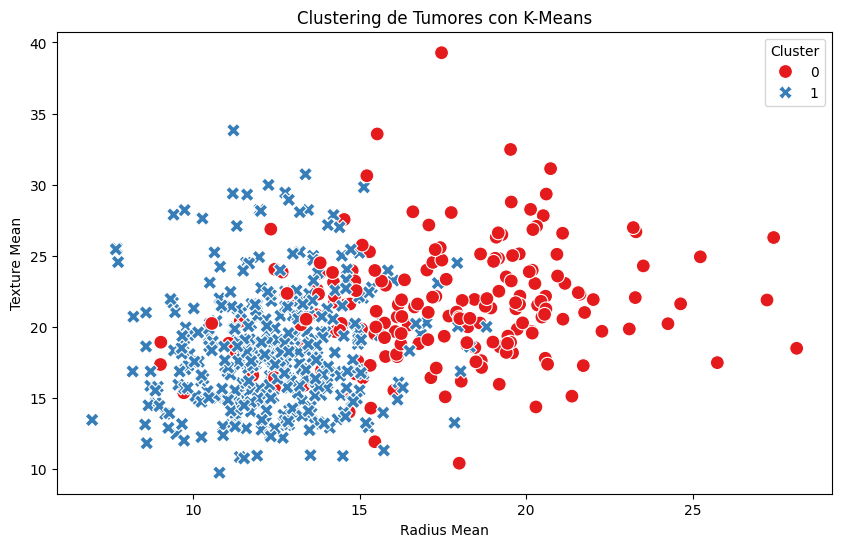

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'diagnosis' (la clase)
X_no_class = df_new.drop(columns=['diagnosis'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_class)

# Aplicar K-Means (por ejemplo, con 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Obtener los resultados del clustering
df_new['Cluster'] = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_new['radius_mean'], y=df_new['texture_mean'], hue=df_new['Cluster'], palette='Set1', style=df_new['Cluster'], s=100)
plt.title('Clustering de Tumores con K-Means')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Cluster')
plt.show()

